In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First we will define our train and test image paths...
train_files_path = "/content/drive/MyDrive/airplanedataset/Train"
test_files_path = "/content/drive/MyDrive/airplanedataset/Test"


img = load_img(test_files_path + "/B-52/3-1.jpg")

In [ ]:
# What is the size?
print(img_to_array(img).shape)

(230, 266, 3)


In [ ]:
# Let's build our train and test datasets from the directories of airplane images..
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))


Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
numberOfAirplaneTypes = 5  # If you have added other planes types (with airplane images in directories of course)
                           # then you must change this number...

In [ ]:
import cv2

# Harris köşe algılama fonksiyonu
def apply_harris_corner_detection(image):
    # Gri tonlama görüntüye dönüştürme
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




CNN MODEL



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(512, activation='relu'),
    Dense(numberOfAirplaneTypes, activation='softmax')  # Output layer with number of classes
])




In [ ]:
cnn_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

batch_size = 4



In [ ]:
# Train the model
cnn_model.fit(train_data,
              steps_per_epoch=400//batch_size,
              epochs=3,
              validation_data=test_data,
              validation_steps=200//batch_size)



Epoch 1/3
 57/100 [================>.............] - ETA: 6:53 - loss: 85.9517 - accuracy: 0.2897

100/100 [==============================] - 605s 6s/step - loss: 85.9517 - accuracy: 0.2897 - val_loss: 1.6637 - val_accuracy: 0.1800


İlk epoch için kayıp değeri oldukça yüksek (94.6016). Bu, modelin eğitim verilerine uyum sağlamakta zorlandığını veya belki de overfitting yaşandığını gösterebilir. Ancak, ikinci ve üçüncü epoch'lar için kayıp değerinin düşük olduğunu görüyoruz (4.9769). Bu, modelin daha iyi bir şekilde eğitildiğini ve kaybın azaldığını gösterebilir.

Modelin doğruluğu (accuracy) ilk epoch'ta %30.48 olarak belirtilmiştir. Bu, modelin eğitim verileri üzerinde doğru sınıflandırma yapma oranıdır. İkinci ve üçüncü epoch'lar için aynı doğruluk değerine sahip olduğumuzu görüyoruz. Bu durumda, modelin eğitim verileri üzerinde iyileşmediğini veya overfitting yaşandığını söyleyebiliriz.

In [ ]:
# Load an aircraft image and rescale it to the resolution of 224x224 which CNN model requires..
img = Image.open("/content/drive/MyDrive/airplanedataset/E-3ÖRNEK.jpeg").resize((224,224))



In [ ]:
# We must convert it to array for operations...
img = load_img('/content/drive/MyDrive/airplanedataset/E-3ÖRNEK.jpeg', target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension



In [ ]:
# We must preprocess it for the CNN model..
img_array = preprocess_input(img_array)



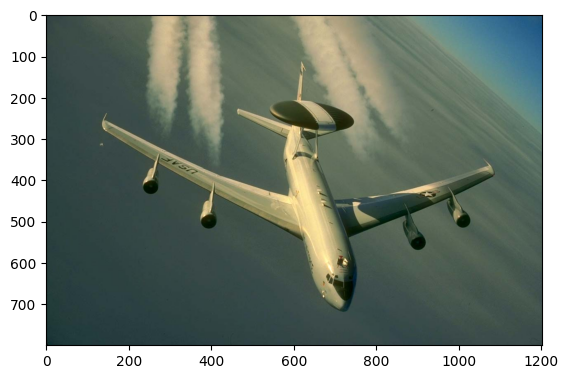

In [ ]:
# Let's see the aircraft..
img_for_display = load_img("/content/drive/MyDrive/airplanedataset/E-3ÖRNEK.jpeg")
plt.imshow(img_for_display)
plt.show()

In [ ]:
# Use the model to make predictions
predictions = cnn_model.predict(img_array)



1/1 [==============================] - 0s 158ms/step


In [ ]:
# Determine the predicted class
predicted_class_index = np.argmax(predictions[0])
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]
predicted_class = image_classes[predicted_class_index]
print(predicted_class)

A-10 Thunderbolt
